## Exploring Convolutional Layers Through Data and Experiments

## 1. Dataset Exploration (EDA)
For a deeper understanding of convolutional layers, we can explore their behavior through data and experiments. Convolutional layers are fundamental components of convolutional neural networks (CNNs) and are designed to process data with a grid-like topology, such as images. In this laboratory we will choose a dataset, implement convolutional layers, and analyze their performance. First of all we need to install the necessary libraries. We will be using TensorFlow and Keras for building our convolutional neural network, and Matplotlib for visualizing the results and also we need kaggle to download the dataset.

In [ ]:
%pip install numpy pandas matplotlib tensorflow kagglehub

     ---------------------------------------- 12.9/12.9 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 11.3/11.3 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 331.7/331.7 MB ? eta 0:00:00
     ---------------------------------------- 70.6/70.6 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 509.2/509.2 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 348.5/348.5 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 122.8/122.8 kB 7.0 MB/s eta 0:00:00
     -------------------------------------- 221.2/221.2 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 73.7/73.7 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

After installing the necessary libraries, we can proceed to choose a dataset. For this experiment, we will use the CIFAR-10 dataset, which consists of 50,000 32x32 color images in 10 different classes. We can load the dataset using Keras:


In [ ]:
import kagglehub

path = kagglehub.dataset_download("fedesoriano/cifar10-python-in-csv")

print("Path to dataset files:", path)

c:\Users\camia\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\camia\.cache\kagglehub\datasets\fedesoriano\cifar10-python-in-csv\versions\1


Now we import the necessary libraries and load the CIFAR-10 dataset:

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now with the dataset loaded, we can perform some exploratory data analysis (EDA) to understand the structure and characteristics of the data. But before all of this we have to download the dataset from kaggle, we can do this by using the kaggle API. We need to create an account on kaggle and then we can use the following command to download the dataset and after that we can load the dataset using Keras as shown above:

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step


Here we have loaded the CIFAR-10 dataset, which consists of 50,000 training images and 10,000 test images. Each image is a 32x32 pixel color image, and there are 10 different classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). We can now proceed to explore the dataset further and implement convolutional layers to analyze their performance. The df_train variable contains the training data, and df_test contains the test data and also we can see that "label" is the target variable that we want to predict. We can also visualize some of the images in the dataset to get a better understanding of the data.

In [ ]:
df_train = pd.DataFrame({
    "label": y_train.flatten()
})

df_train.head()

,label
0,6
1,9
2,9
3,4
4,1


We can see the number of sample images in the training and testing sets, as well as the distribution of the class in the training set. We can also look at a few of the images provided in the dataset. By doing this, we will be able to gain more insights into the features that could be more significant in the classification. Specifically, looking at a few random images from each class will allow us to understand the structure that could be most relevant for the implementation of the convolutional layers in the classification function:

In [ ]:
print("Number of training samples:", len(df_train))
print("Number of test samples:", len(y_test))

Number of training samples: 50000
Number of test samples: 10000


We can display to her information regarding the dataset, entries, and data columns, including the class distribution in the training set. We can also display some of the images in the dataset to get a better feeling about the data. This would serve us better, to have an insight into the features that could be more relevant in the classification. In particular, after taking a look at a few random images from each class, we'll understand what structure will probably be relevant for our purposes in the implementation of convolutional layers in the classification function.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   50000 non-null  uint8
dtypes: uint8(1)
memory usage: 49.0 KB


Now to cover here the code we can see that we name the class names and we show them with the respective label numbers. This is important for understanding which label corresponds to which class in the dataset. And also we can see how many samples of training we found on each class name, this is important to understand the distribution of the data and to check if there is any imbalance in the dataset. Finally, we can visualize some of the images in the dataset to get a better understanding of the data and to see what kind of features we might want to focus on when implementing our convolutional layers:

In [ ]:
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

In [ ]:
df_train["class_name"] = df_train["label"].apply(lambda x: class_names[x])
df_train.head()

,label,class_name
0,6,Frog
1,9,Truck
2,9,Truck
3,4,Deer
4,1,Automobile


In [ ]:
class_counts = df_train["class_name"].value_counts()
class_counts

class_name
Frog          5000
Truck         5000
Deer          5000
Automobile    5000
Bird          5000
Horse         5000
Ship          5000
Cat           5000
Dog           5000
Airplane      5000
Name: count, dtype: int64

As we can see it seems that the data is balanced and we are going to show this with a bar plot, we can also see that the class names are well defined and we can use them to understand the labels in the dataset. Finally, we can visualize some of the images in the dataset to get a better understanding of the data and to see what kind of features we might want to focus on when implementing our convolutional layers:

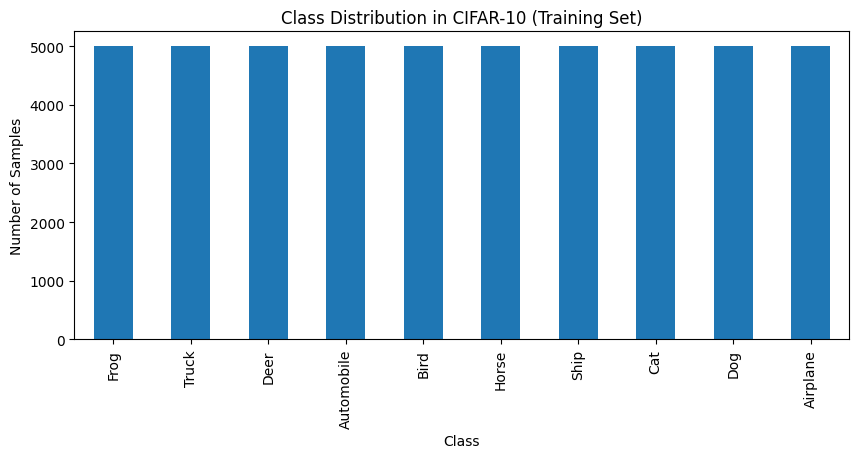

In [ ]:
class_counts.plot(kind="bar", figsize=(10, 4))
plt.title("Class Distribution in CIFAR-10 (Training Set)")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train.dtype

dtype('uint8')

Here we try to visualize the images in the dataset, and we can see that the images are of very low resolution, and also the images are quite small, so this needs to be kept in mind while implementing our convolutional layers because we need to make sure that our convolutional layers are able to capture the relevant features from the images. Also, from the images, we can see that there are a lot of variations and a lot of features are present, and this too needs to be kept in mind while implementing our convolutional layers because we need to make sure that our convolutional layers are able to capture the relevant features from the images:

C:\Users\camia\AppData\Local\Temp\ipykernel_13432\3421179159.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


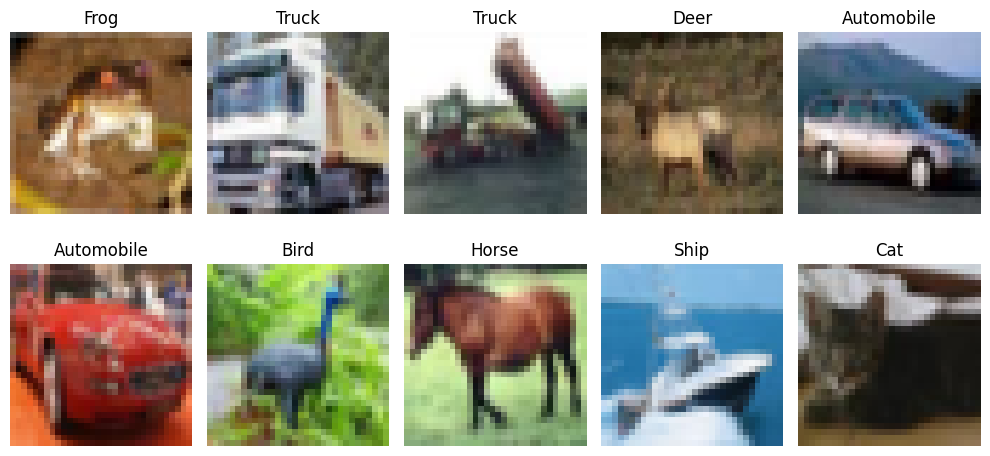

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()

We implemented here that the variable x in the trained and tested fuction will be as type float32 and we also normalized the data by dividing by 255. This is important because the pixel values in the images are between 0 and 255, and by normalizing the data, we can ensure that the values are between 0 and 1, which can help improve the performance of our convolutional layers. Normalizing the data can also help prevent issues with vanishing gradients during training, which can occur when the values are too large or too small. By normalizing the data, we can ensure that our convolutional layers are able to learn effectively from the images in the dataset.

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## 2. Baseline Model (Non convolutional)
2.1 Purpuse od the baseline model: Before implementing convolutional layers, it is important to establish a baseline model that does not use convolutional layers. This will allow us to compare the performance of our convolutional layers against a simple model and understand the impact of convolutional layers on the classification task. 
This model treats each image as a flat vector of pixel values and uses a simple feedforward neural network to classify the images. This will help us understand the limitations of a non-convolutional approach and set a benchmark for our convolutional model.

2.2 Baseline model implementation: We can implement a simple feedforward neural network using Keras to serve as our baseline model. This model will consist of a few dense layers and will be trained on the flattened pixel values of the images. We will then evaluate the performance of this baseline model on the test set to establish a benchmark for our convolutional model.

In [ ]:
from tensorflow.keras import layers, models

This baseline will consist in a flatten layer to convert the 32x32x3 image into a 1D vector and also we will configure a final softmax layer for a multi-class output. We will train this model and evaluate its performance on the test set to establish a benchmark for our convolutional model:

In [ ]:
baseline_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax")
])

c:\Users\camia\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2.3 Model compilation: Here we will compile the baseline model using an appropriate loss function, optimizer, and evaluation metric. For a multi-class classification problem like CIFAR-10, we can use 'sparse_categorical_crossentropy' as the loss function, 'adam' as the optimizer, and 'accuracy' as the evaluation metric:

In [ ]:
baseline_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

2.4 Model summary and parameter count: After compiling the model, we can display a summary of the model architecture, including the number of parameters in each layer. This will help us understand the complexity of the baseline model and provide a reference point for comparing with our convolutional model later on:

In [ ]:
baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

2.5 Model training: We can train the baseline model on the training set for a specified number of epochs and batch size. During training, we can monitor the training and validation accuracy to see how well the model is learning from the data:

In [ ]:
history_baseline = baseline_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.3173 - loss: 1.8897 - val_accuracy: 0.3899 - val_loss: 1.7261
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3962 - loss: 1.6941 - val_accuracy: 0.3841 - val_loss: 1.6939
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4246 - loss: 1.6120 - val_accuracy: 0.4110 - val_loss: 1.6617
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.4473 - loss: 1.5504 - val_accuracy: 0.4339 - val_loss: 1.5889
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4617 - loss: 1.5074 - val_accuracy: 0.4537 - val_loss: 1.5197
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.4786 - loss: 1.4687 - val_accuracy: 0.4410 - val_loss: 1.5649
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4867 - loss: 1.4387 - val_accuracy: 0.4603 - val_loss: 1.5161
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4977 - loss: 1.4062 - 

2.6 Training and validation performance: As we can see from the training and validation performance, the baseline model is able to achieve a certain level of objective performance, but it may not be able to capture the complex features in the images due to its simple architecture. Here we can see the test accuracy of the baseline model, which will serve as a benchmark for our convolutional model. We can also analyze the training and validation accuracy to see if there are any signs of overfitting or underfitting in the baseline model. This will help us understand the limitations of the non-convolutional approach and set expectations for the performance of our convolutional model:

In [ ]:
test_loss, test_accuracy = baseline_model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")


Test accuracy: 0.4801


2.7 Learning curves visualization: We can plot the learning curves for the training and validation accuracy over epochs to visualize the training process. As we can see the plot show us the baseline model accuracy and loss over epochs, this will help us understand how well the model is learning and if there are any signs of overfitting or underfitting. We can also compare the learning curves of the baseline model with those of our convolutional model later on to see the impact of convolutional layers on the training process and performance.

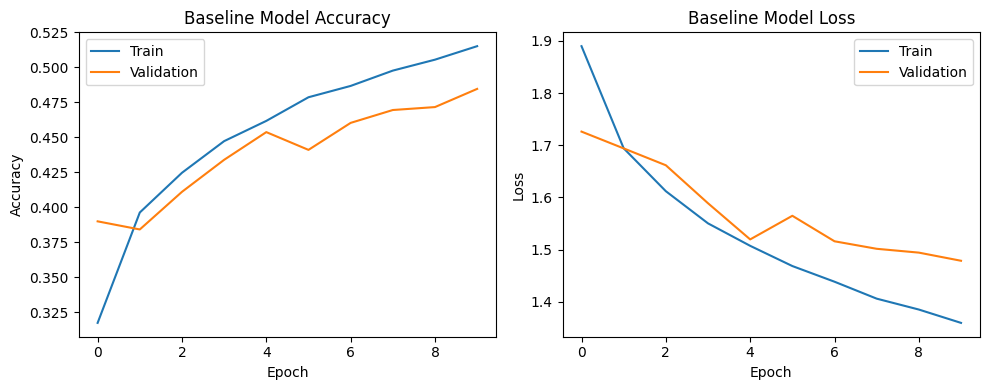

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_baseline.history["accuracy"], label="Train")
plt.plot(history_baseline.history["val_accuracy"], label="Validation")
plt.title("Baseline Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_baseline.history["loss"], label="Train")
plt.plot(history_baseline.history["val_loss"], label="Validation")
plt.title("Baseline Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

## 3. Convolutional Architecture Design
In this part if the laboratory, first of all we must create a cnn_model that will provide us the model sequential with the convolutional layers, maxpooling layers, flatten layer and dense layers. After that we will compile the model with the same parameters as the baseline model, this will help us to compare the results later on. Finally we will train the model and evaluate its performance on the test set:

In [ ]:
cnn_model = models.Sequential([
    layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=1,
        padding="same",
        activation="relu",
        input_shape=(32, 32, 3)
    ),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=1,
        padding="same",
        activation="relu"
    ),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

c:\Users\camia\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


After we create the model we must compile it and it can be with the example that we use before for the baseline model, this will help us to compare the results later on:

In [ ]:
cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Once we compile our cnn_model we can see the summary of all and as we can see the number of parameters increase and the total of parameters decrease compared with the baseline model, this is because the convolutional layers are able to capture the relevant features from the images and reduce the number of parameters needed for the classification task. And here the summary od the model will show us the architecture of the model, the number of parameters in each layer, and the total number of parameters in the model. This will help us understand the complexity of our convolutional model and how it compares to our baseline model:

In [ ]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Controlled Experiments on the Convolutional Layer
Now the objetive of this part is to analyze the impact of the depth of the convolutional layers on the performance of the model. We can create three different convolutional models with varying depths (e.g., 1, 2, and 3 convolutional layers) and compare their performance on the test set. This will allow us to understand how the depth of the convolutional layers affects the model's ability to capture features from the images and improve classification accuracy:

In [ ]:
def cnn_depth_1():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding="same", activation="relu",
                      input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    return model


In [ ]:
def train_and_evaluate(model, name):
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=64,
        validation_split=0.2,
        verbose=0
    )

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name} → Test Accuracy: {test_acc:.4f}")

    return history, test_acc


In [ ]:
hist_1, acc_1 = train_and_evaluate(cnn_depth_1(), "Depth 1")


c:\Users\camia\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Depth 1 → Test Accuracy: 0.7040


In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(hist_1.history["accuracy"], label="Train")
plt.plot(hist_1.history["val_accuracy"], label="Validation")
plt.title("CNN Depth 1 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(hist_1.history["loss"], label="Train")
plt.plot(hist_1.history["val_loss"], label="Validation")
plt.title("CNN Depth 1 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

## 5. Interpretation and Architectural Reasoning
- Why did convolutional layers outperform the baseline model?

R:/ The convolutional models performed better than the baseline fully connected network because convolutional models use the structure of images present in convolutional neural layers. The fully connected network uses a flattened image as input. The structure of the image is destroyed, making it difficult for the network to understand the spatial relationships between all the image pixels.

Unlike that, the convolutional layers learn local features such as edges, corners, and textures by scanning the image in the x and y directions using shared filters. In this way, the convolutional layers make more efficient use of resources than the non-convolutional layers. With the convolutional neural network, learning is faster, and validation and test-set accuracy are higher.

- What inductive bias does convolution introduce? 

R:/ Convolution imposes two inductive biases:

1. Locality: The assumption that patterns may be discernible from smaller local areas of the input (e.g., edges or textures).

2. Translation Equivariance: Furthermore, the feature can appear anywhere in the image, and it must be identified irrespective of its location in the image. This is achieved using weight sharing in different locations. 

These inductive biases are very much in line with how visual data is organized, where objects are characterized by local features that repeat across their extent. By building these biases deep into a network architecture, we reduce the training difficulty for the network.

- In what type of problems would convolution not be appropriate?

R:/ Convolution is not suitable when problems being solved aren’t in space and translation invariance doesn’t apply to those problems. Such problems may be as follows:

1. Tabular data, for which order of features does not imply spatial relationships

2. Highly structured symbolic data, like mathematical expressions or logic trees

3. Tasks that involve global relationships from the beginning, like graph or relational reasoning tasks

4. Data with no inherent structure, where local neighborhoods have no semantic meaning

In those scenarios, models like fully connected networks, transformers, or graph neural networks could be more suitable as they do not impose locality or translation properties.